# **COMP3212 Computational Biology Lab 1 and Lab 2**

## **Week 1 Lab**
### --Import library and CSV file using pandas



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy.stats import spearmanr
import seaborn as sns
uploaded = files.upload()

Saving Cell-Cycle-Set.csv to Cell-Cycle-Set (3).csv


## 1. Import the cell cycle dataset excel spreadsheet (using Pandas). Clean up the data by droping the rows contain NaN value in GOBP,GOMF and GOCC column. 

In [2]:
import io
Cell_Cycle_Set = pd.read_csv(io.BytesIO(uploaded['Cell-Cycle-Set.csv']))
# Dataset is now stored in a Pandas Dataframe
#print(Cell_Cycle_Set.size)
Cell_Cycle_Set = Cell_Cycle_Set.dropna()
Cell_Cycle_Set.head()
#print(Cell_Cycle_Set.size)

,Gene_Name,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2,GOBP,GOMF,GOCC
1,RBM47,10.330107,10.396423,10.677257,24.748020,22.426777,24.651200,base conversion or substitution editing;biolog...,binding;nucleic acid binding;nucleotide bindin...,apolipoprotein B mRNA editing enzyme complex;c...
2,ADAM9,12.321340,12.203630,12.233293,19.083593,16.248873,19.281277,activation of MAPKK activity;activation of pro...,binding;catalytic activity;cation binding;coll...,cell part;extracellular region part;extracellu...
3,UBA6,10.827333,10.758463,10.685847,24.614467,21.356450,25.207883,catabolic process;cellular catabolic process;c...,adenyl nucleotide binding;adenyl ribonucleotid...,cell part;cytoplasm;intracellular part
5,SHTN1,10.845517,10.824347,10.634980,26.112690,22.905927,26.138843,axon guidance;chemotaxis;locomotion;response t...,binding;enzyme binding;kinase binding;protein ...,axon;cell part;cell projection;neuron projection
6,SIL1,9.042438,8.924093,9.035878,22.750520,20.598227,23.093443,cellular macromolecule metabolic process;cellu...,binding;protein binding;unfolded protein binding,cell part;cytoplasmic part;endoplasmic reticul...


## **Task 1** - Plot a Histogram  of one of the cell cycle stages of the RNA and protein distribution,  Do you notice anything interesting with regards to the mean/variance of the distribution?
### Stage G1 of the RNA and protein distribution is plotted
1. The mean and variance of protein is higher than that of RNA for every cell cycle. The mean of RNA is 11.2 compare to mean of protein at G1 stage 25.4. The variance of G1 RNA is 2.2 while variance of G1 protein is 10.5.
2. In greneral, the one RNA in each cycle is able systhesies many proteins and one RNA synthesies difference variance of protein.  

mean of G1 RNA =  11.215627083957184
mean of G1 protein =  25.35167163725439
variance of G1 RNA =  2.1605056140324033
variance of G1 protein =  10.453573575282366


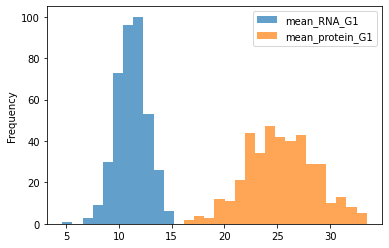

In [3]:
########## plot histogram of G1 stage of RNA and protein ###############
#Cell_Cycle_Set.hist(bins=30)
#Cell_Cycle_Set.plot.hist(bins=20, alpha=0.7)
Cell_Cycle_Set[["mean_RNA_G1", "mean_protein_G1"]].plot.hist(bins=30,alpha=0.7)
print("mean of G1 RNA = ",Cell_Cycle_Set.loc[:,"mean_RNA_G1"].mean())
print("mean of G1 protein = ",Cell_Cycle_Set.loc[:,"mean_protein_G1"].mean())
print("variance of G1 RNA = ",Cell_Cycle_Set.loc[:,"mean_RNA_G1"].var())
print("variance of G1 protein = ",Cell_Cycle_Set.loc[:,"mean_protein_G1"].var())

## **Task 2** - Look at the pairwise correlations between each of the RNA/protein columns (this can be achieved using the corr() function). Does the change in timestep have much effect on the relationship(s) between RNA and protein?
1. The pairwise correlations between each RNA and protein can be read from corelations of RNA and protein during G1, S, G2.
2. The pairwise correlations between of RNA and protein at G1,S,G2 is 0.522, 0.536 and 0.532 repectively.
3. This suggest that a change in timestep does not lead to a big change in correlation of RNA/Protein although small variation does incur




In [4]:
########## Pairwise Correlation #############
Cell_Cycle_Set.corr()

,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2
mean_RNA_G1,1.000000,0.991063,0.992023,0.522658,0.541428,0.544206
mean_RNA_S,0.991063,1.000000,0.986836,0.514705,0.536190,0.534322
mean_RNA_G2,0.992023,0.986836,1.000000,0.510364,0.529690,0.532565
mean_protein_G1,0.522658,0.514705,0.510364,1.000000,0.970289,0.977016
mean_protein_S,0.541428,0.536190,0.529690,0.970289,1.000000,0.975964
mean_protein_G2,0.544206,0.534322,0.532565,0.977016,0.975964,1.000000


## **Task 3** - Generate a scatterplot of the RNA versus. protein for each cell cycle stage. Fit a linear model to the data, can we infer protein concentration from RNA concentration?
1. The distribution of RNA vs protein at each cell cycle stage shows similar pattern when linear model fit into the data. The gradient is the same.
2. Although there is a slightly lower concentration of RNA and protein at S stage.

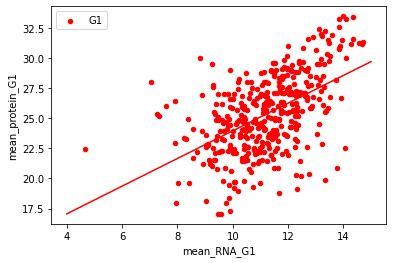

In [5]:
#####################  RNA versus. protein for each cell cycle stage ########################
def linear_fit(X,y):
    num = (X*y).mean() - (X.mean()*y.mean())
    den = (X**2).mean() - (X.mean())**2
    w1 = num/den
    w0 = y.mean() - w1*X.mean()
    return w0, w1
## G1
RNAG1 = Cell_Cycle_Set['mean_RNA_G1']
ProteinG1 = Cell_Cycle_Set['mean_protein_G1']
w0, w1 = linear_fit(RNAG1,ProteinG1)
xG1 = np.linspace(4,15,100)
yG1 = w1*xG1+w0

## S
RNAS = Cell_Cycle_Set['mean_RNA_S']
ProteinS = Cell_Cycle_Set['mean_protein_S']
w0, w1 = linear_fit(RNAS,ProteinS)
xS = np.linspace(4,15,100)
yS = w1*xG1+w0

## G2
RNAG2 = Cell_Cycle_Set['mean_RNA_G2']
ProteinG2 = Cell_Cycle_Set['mean_protein_G2']
w0, w1 = linear_fit(RNAG2,ProteinG2)
xG2 = np.linspace(4,15,100)
yG2 = w1*xG1+w0

ax0 = plt.gca()
ax3 = plt.plot(xG1, yG1, '-r')
ax4 = Cell_Cycle_Set.plot(kind='scatter', x='mean_RNA_G1',y='mean_protein_G1', color='r', label = 'G1',ax=ax0)

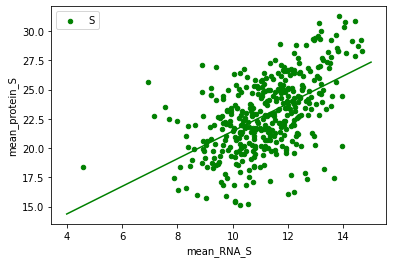

In [6]:
ax1 = plt.gca()
ax5 = plt.plot(xS, yS, '-g')
ax6 = Cell_Cycle_Set.plot(kind='scatter', x='mean_RNA_S', y='mean_protein_S', color='g', label = 'S',ax=ax1)

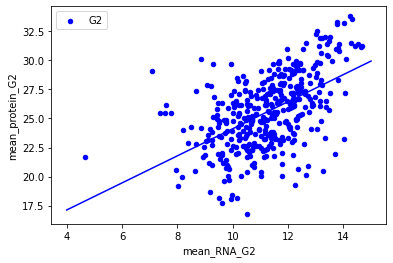

In [7]:
ax2 = plt.gca()
ax7 = plt.plot(xG2, yG2, '-b')
ax8 = Cell_Cycle_Set.plot(kind='scatter', x='mean_RNA_G2', y='mean_protein_G2', color='b',label = 'G2', ax=ax2)

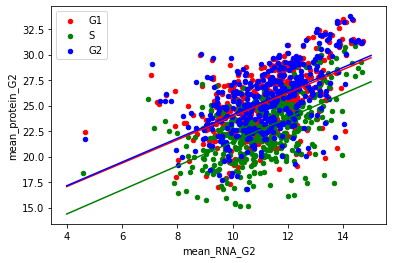

In [8]:
ax0 = plt.gca()
ax3 = plt.plot(xG1, yG1, '-r')
ax4 = Cell_Cycle_Set.plot(kind='scatter', x='mean_RNA_G1',y='mean_protein_G1', color='r', label = 'G1',ax=ax0)
ax1 = plt.gca()
ax5 = plt.plot(xS, yS, '-g')
ax6 = Cell_Cycle_Set.plot(kind='scatter', x='mean_RNA_S', y='mean_protein_S', color='g', label = 'S',ax=ax1)
ax2 = plt.gca()
ax7 = plt.plot(xG2, yG2, '-b')
ax8 = Cell_Cycle_Set.plot(kind='scatter', x='mean_RNA_G2', y='mean_protein_G2', color='b',label = 'G2', ax=ax2)


## **Week 2 Lab**
### **Task 1** - Find all genes that contain 'cell cycle' in their GOBP term and plot them as a scatterplot (with different colour) overlaid across all genes for each cell cycle phase. Is there a stronger/weaker correlation?

1. There are 71 rows of genes that contain "cell cycle" in GOBP process. As shown in the graph below for each cell cycle.
2. This gives a lower pairwise correlation between RNA and protein for each cell cycle.Compare to original dataset.

number of GOBP process contains "cell cycle" : 71
Correlation between RNA and protein for rows contain "cell cycle" in GOBP 


,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2
mean_RNA_G1,1.000000,0.993228,0.974701,0.436546,0.434837,0.453532
mean_RNA_S,0.993228,1.000000,0.980132,0.442141,0.438388,0.457854
mean_RNA_G2,0.974701,0.980132,1.000000,0.428266,0.426218,0.453327
mean_protein_G1,0.436546,0.442141,0.428266,1.000000,0.992084,0.991121
mean_protein_S,0.434837,0.438388,0.426218,0.992084,1.000000,0.986301
mean_protein_G2,0.453532,0.457854,0.453327,0.991121,0.986301,1.000000


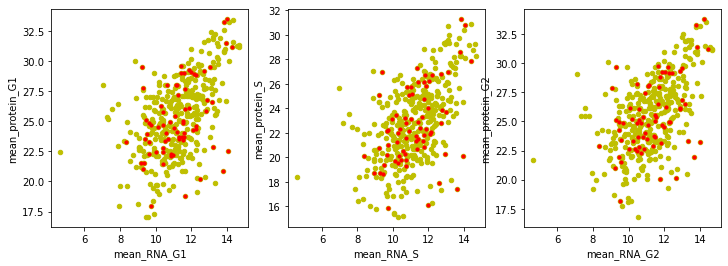

In [9]:
## gobp as the gene contains 'cell cycle' in the GOBP columns
gobp = Cell_Cycle_Set[Cell_Cycle_Set.GOBP.str.contains('cell cycle')]
fig4,ax4 = plt.subplots(ncols=3, figsize=(12,4))
Cell_Cycle_Set.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax4[0], color='y')
ax4[0].scatter(gobp.mean_RNA_G1, gobp.mean_protein_G1, color='r', s=10.)
Cell_Cycle_Set.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax4[1], color='y')
ax4[1].scatter(gobp.mean_RNA_S, gobp.mean_protein_S, color='r', s=10.)
Cell_Cycle_Set.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax4[2], color='y')
ax4[2].scatter(gobp.mean_RNA_G2, gobp.mean_protein_G2, color='r', s=10.)
print('number of GOBP process contains "cell cycle" :' , len(gobp))
fig4
print('Correlation between RNA and protein for rows contain "cell cycle" in GOBP ')
gobp.corr()

### **Task 2** - Repeat task 1 by finding genes that contain 'ribosome' in their GOCC term.

1. There are only 19 rows of genes that contain "ribosome" in GOBP process. As shown in the graph below for each cell cycle.
2. This gives a higher pairwise correlation between RNA and protein for each cell cycle.Compared to original dataset as can be seen in range of 0.84-85 for each pair in cell cycle stage.

19
Correlation between RNA and protein for rows contain "Ribosome" in GOCC 


,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2
mean_RNA_G1,1.000000,0.997851,0.999540,0.840801,0.848882,0.852274
mean_RNA_S,0.997851,1.000000,0.996900,0.832572,0.844801,0.845251
mean_RNA_G2,0.999540,0.996900,1.000000,0.836108,0.844280,0.847706
mean_protein_G1,0.840801,0.832572,0.836108,1.000000,0.990856,0.998165
mean_protein_S,0.848882,0.844801,0.844280,0.990856,1.000000,0.990858
mean_protein_G2,0.852274,0.845251,0.847706,0.998165,0.990858,1.000000


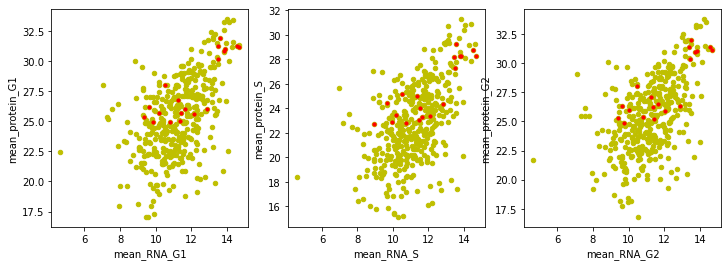

In [10]:
gocc = Cell_Cycle_Set[Cell_Cycle_Set.GOCC.str.contains('ribosome')]
fig5,ax5 = plt.subplots(ncols=3, figsize=(12,4))
Cell_Cycle_Set.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax5[0], color='y')
ax5[0].scatter(gocc.mean_RNA_G1, gocc.mean_protein_G1, color='r', s=10.)
Cell_Cycle_Set.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax5[1], color='y')
ax5[1].scatter(gocc.mean_RNA_S, gocc.mean_protein_S, color='r', s=10.)
Cell_Cycle_Set.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax5[2], color='y')
ax5[2].scatter(gocc.mean_RNA_G2, gocc.mean_protein_G2, color='r', s=10.)
print(len(gocc))
fig5
print('Correlation between RNA and protein for rows contain "Ribosome" in GOCC ')
gocc.corr()

## **Task 3** - Count the number of occurrences of every GOBP term across all genes, what are some of the difficulties that arise when using these terms?
1. The difficulty arise when using this term is when full number of counts doesnt show out 2854 rows completely, this does not give full insight of data
2. If string that differ by one character but is the same function or process maybe be count as a different term. This may cause inaccuracy.

In [11]:
#Cell_Cycle_Set.GOBP.str.split(';',expand=True)
## str.split(';') function split the string whenever ';' appear, return the table contains each of the words.
## stack() function stacks the splited string from table to form a long columns contains uncounted but the index position of each words.
## value_counts() return the counted string, whenever a repeat string appears in the long columns it increases the count number.
#Cell_Cycle_Set.GOBP.str.split(';',expand=True).stack()
Cell_Cycle_Set.GOBP.str.split(';',expand=True).stack().value_counts().to_frame(name = 'counter')
#print(word_count)



,counter
cellular process,377
metabolic process,273
cellular metabolic process,260
primary metabolic process,255
biological regulation,236
...,...
cysteinyl-tRNA aminoacylation,1
regulation of metanephros development,1
regulation of reciprocal meiotic recombination,1
activation of Ral GTPase activity,1


## **Task 4** - Calculate the change in mRNA/protein level across the cell cycle by taking the difference at each stage (G1-S, S-G2, G2-G1), and standardize the differences by mean-centering and variance scaling. Repeat tasks 1 and 2 by plotting the changes in levels with GOBP/GOCC labelling. What do we notice about changes in the cell cycle? Is there any apparent clustering of GO terms?
1. First is done by the mean of RNA/Protein of next stage minus present stage.  6 new series in data frame is generated.
2. Secondly, normalise the data such that 0 aligns at zero, this ease data illustration. Using function (x-mean(x))/std(x)
3. The gene contains "cell cycle" in GOBP or contains "RNA" in GOCC is picked and label in red and blue repectively.
4. The correlation is computed and it shows weak correlation between RNA and proteins of both "cell cycle" in GOBP and "Ribosomes" in GOCC. Shown on table below.

,mean_RNA_g1s,mean_RNA_sg2,mean_RNA_g2g1,mean_protein_g1s,mean_protein_sg2,mean_protein_g2g1
mean_RNA_g1s,1.000000,-0.053661,-0.465473,-0.136298,0.029437,0.091127
mean_RNA_sg2,-0.053661,1.000000,-0.858809,0.064459,0.240986,-0.356823
mean_RNA_g2g1,-0.465473,-0.858809,1.000000,0.012793,-0.228698,0.269515
mean_protein_g1s,-0.136298,0.064459,0.012793,1.000000,-0.603403,-0.191770
mean_protein_sg2,0.029437,0.240986,-0.228698,-0.603403,1.000000,-0.666922
mean_protein_g2g1,0.091127,-0.356823,0.269515,-0.191770,-0.666922,1.000000


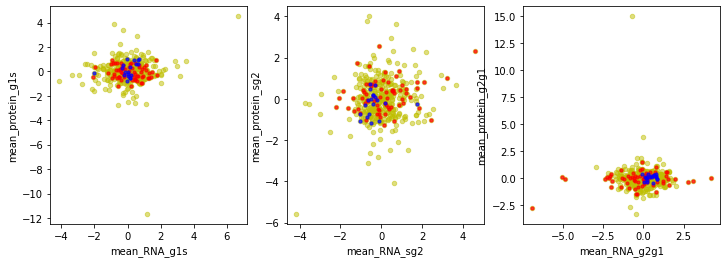

In [12]:
## take the difference between 2 cell cycle stage and compare
Cell_Cycle_Set['mean_RNA_g1s'] = (Cell_Cycle_Set.mean_RNA_S - Cell_Cycle_Set.mean_RNA_G1)
Cell_Cycle_Set['mean_RNA_sg2'] = (Cell_Cycle_Set.mean_RNA_G2 - Cell_Cycle_Set.mean_RNA_S)
Cell_Cycle_Set['mean_RNA_g2g1'] = (Cell_Cycle_Set.mean_RNA_G1 - Cell_Cycle_Set.mean_RNA_G2)
Cell_Cycle_Set['mean_protein_g1s'] = (Cell_Cycle_Set.mean_protein_S - Cell_Cycle_Set.mean_protein_G1)
Cell_Cycle_Set['mean_protein_sg2'] = (Cell_Cycle_Set.mean_protein_G2 - Cell_Cycle_Set.mean_protein_S)
Cell_Cycle_Set['mean_protein_g2g1'] = (Cell_Cycle_Set.mean_protein_G1 - Cell_Cycle_Set.mean_protein_G2)

## standardise the data
Cell_Cycle_Set.iloc[:,-6:] = (Cell_Cycle_Set.iloc[:,-6:] - Cell_Cycle_Set.iloc[:,-6:].mean(axis=0)) / Cell_Cycle_Set.iloc[:,-6:].std(axis=0)

gobp = Cell_Cycle_Set[Cell_Cycle_Set.GOBP.str.contains('cell cycle')]
gocc = Cell_Cycle_Set[Cell_Cycle_Set.GOCC.str.contains('ribosome')]
fig6,ax6 = plt.subplots(ncols=3, figsize=(12,4))
Cell_Cycle_Set.plot.scatter('mean_RNA_g1s', 'mean_protein_g1s', ax=ax6[0], color='y', alpha=.5)
Cell_Cycle_Set.plot.scatter('mean_RNA_sg2', 'mean_protein_sg2', ax=ax6[1], color='y',alpha=.5)
Cell_Cycle_Set.plot.scatter('mean_RNA_g2g1', 'mean_protein_g2g1', ax=ax6[2], color='y', alpha=.5)
ax6[0].scatter(gobp.mean_RNA_g1s, gobp.mean_protein_g1s, color='r', s=10., alpha=.7)
ax6[1].scatter(gobp.mean_RNA_sg2, gobp.mean_protein_sg2, color='r', s=10., alpha=.7)
ax6[2].scatter(gobp.mean_RNA_g2g1, gobp.mean_protein_g2g1, color='r', s=10., alpha=.7)
ax6[0].scatter(gocc.mean_RNA_g1s, gocc.mean_protein_g1s, color='b', s=10., alpha=.7)
ax6[1].scatter(gocc.mean_RNA_sg2, gocc.mean_protein_sg2, color='b', s=10., alpha=.7)
ax6[2].scatter(gocc.mean_RNA_g2g1, gocc.mean_protein_g2g1, color='b', s=10., alpha=.7)

## Check Correlation of rows "cell cycle" in GOBP
gobp = gobp.drop(gobp.columns[[1, 2, 3, 4, 5, 6]], axis=1)
gobp.corr()


In [13]:
## Check Correlation of rows "ribosome" in GOCC
gocc = gocc.drop(gocc.columns[[1, 2, 3, 4, 5, 6]], axis=1)
gocc.corr()

,mean_RNA_g1s,mean_RNA_sg2,mean_RNA_g2g1,mean_protein_g1s,mean_protein_sg2,mean_protein_g2g1
mean_RNA_g1s,1.000000,-0.926479,0.264541,0.346152,-0.259065,-0.296765
mean_RNA_sg2,-0.926479,1.000000,-0.608032,-0.184381,0.130609,0.174823
mean_RNA_g2g1,0.264541,-0.608032,1.000000,-0.257748,0.211823,0.178056
mean_protein_g1s,0.346152,-0.184381,-0.257748,1.000000,-0.920811,-0.466284
mean_protein_sg2,-0.259065,0.130609,0.211823,-0.920811,1.000000,0.084345
mean_protein_g2g1,-0.296765,0.174823,0.178056,-0.466284,0.084345,1.000000


## **Optional Task -** We encourage you to use other terms in GOBP, GOMF or GOCC and try to find clustering/correlations by using them.
1. In this part, gene code for "GTP binding" in GOMF is investigated.
2. The cluster of the specific gene coded for "GTP binding" is plotted and the number of them are 18. This based on the cluster it gives very small correlation between the its RNA/Protein synthesies.

Gene coded for "GTP binding" in GOMF =  18


,mean_RNA_g1s,mean_RNA_sg2,mean_RNA_g2g1,mean_protein_g1s,mean_protein_sg2,mean_protein_g2g1
mean_RNA_g1s,1.000000,-0.522916,-0.496644,-0.092361,0.094625,-0.046349
mean_RNA_sg2,-0.522916,1.000000,-0.480127,-0.008470,0.010853,-0.009621
mean_RNA_g2g1,-0.496644,-0.480127,1.000000,0.103674,-0.108430,0.057496
mean_protein_g1s,-0.092361,-0.008470,0.103674,1.000000,-0.919570,0.242744
mean_protein_sg2,0.094625,0.010853,-0.108430,-0.919570,1.000000,-0.604395
mean_protein_g2g1,-0.046349,-0.009621,0.057496,0.242744,-0.604395,1.000000


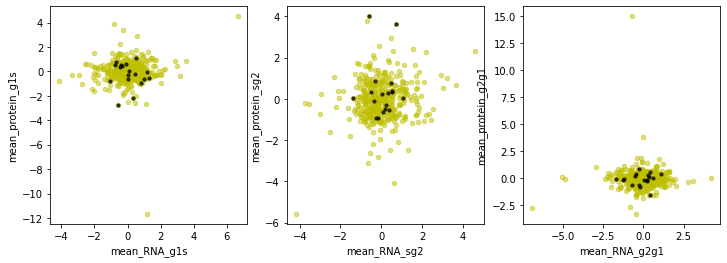

In [14]:
Cell_Cycle_Set['mean_RNA_g1s'] = (Cell_Cycle_Set.mean_RNA_S - Cell_Cycle_Set.mean_RNA_G1)
Cell_Cycle_Set['mean_RNA_sg2'] = (Cell_Cycle_Set.mean_RNA_G2 - Cell_Cycle_Set.mean_RNA_S)
Cell_Cycle_Set['mean_RNA_g2g1'] = (Cell_Cycle_Set.mean_RNA_G1 - Cell_Cycle_Set.mean_RNA_G2)
Cell_Cycle_Set['mean_protein_g1s'] = (Cell_Cycle_Set.mean_protein_S - Cell_Cycle_Set.mean_protein_G1)
Cell_Cycle_Set['mean_protein_sg2'] = (Cell_Cycle_Set.mean_protein_G2 - Cell_Cycle_Set.mean_protein_S)
Cell_Cycle_Set['mean_protein_g2g1'] = (Cell_Cycle_Set.mean_protein_G1 - Cell_Cycle_Set.mean_protein_G2)

Cell_Cycle_Set.iloc[:,-6:] = (Cell_Cycle_Set.iloc[:,-6:] - Cell_Cycle_Set.iloc[:,-6:].mean(axis=0)) / Cell_Cycle_Set.iloc[:,-6:].std(axis=0)

GOMF = Cell_Cycle_Set[Cell_Cycle_Set.GOMF.str.contains('GTP binding')]
print('Gene coded for "GTP binding" in GOMF = ', len(GOMF))
fig6,ax6 = plt.subplots(ncols=3, figsize=(12,4))
Cell_Cycle_Set.plot.scatter('mean_RNA_g1s', 'mean_protein_g1s', ax=ax6[0], color='y', alpha=.5)
Cell_Cycle_Set.plot.scatter('mean_RNA_sg2', 'mean_protein_sg2', ax=ax6[1], color='y',alpha=.5)
Cell_Cycle_Set.plot.scatter('mean_RNA_g2g1', 'mean_protein_g2g1', ax=ax6[2], color='y', alpha=.5)
ax6[0].scatter(GOMF.mean_RNA_g1s, GOMF.mean_protein_g1s, color='black', s=10., alpha=.7)
ax6[1].scatter(GOMF.mean_RNA_sg2, GOMF.mean_protein_sg2, color='black', s=10., alpha=.7)
ax6[2].scatter(GOMF.mean_RNA_g2g1, GOMF.mean_protein_g2g1, color='black', s=10., alpha=.7)

GOMF = GOMF.drop(GOMF.columns[[1, 2, 3, 4, 5, 6]], axis=1)
GOMF.corr()